# Problem Set #2
## Li Ruixue

1(a) Plot histogram of percentages of income.txt data with 30 bins

In [75]:
import numpy as np
import scipy.stats as sts
pts = np.loadtxt('incomes.txt')

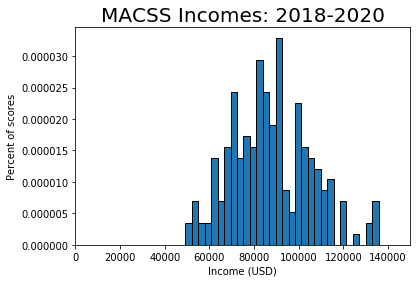

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(pts, 30, edgecolor='black', normed=True)
plt.title('MACSS Incomes: 2018-2020', fontsize=20)
plt.xlabel('Income (USD)')
plt.ylabel('Percent of scores')
plt.xlim([0, 150000])
plt.show()

(b) Plot lognormal PDF

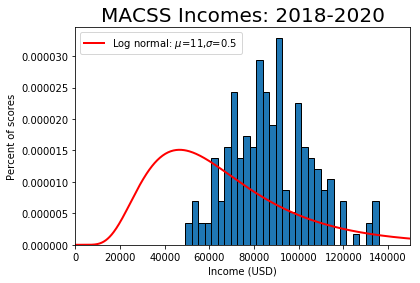

Log-likelihood -2385.856997808558


In [88]:
def lognorm_pdf(xvals, mu, sigma):
    pdf_vals    = (1/(xvals * sigma * np.sqrt(2 * np.pi)) * 
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    return pdf_vals

def log_lik_lognorm(xvals, mu, sigma):
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum() 
    return log_lik_val

dist_pts = np.linspace(1, 150000, 500)
mu_1 = 11
sig_1 = 0.5
plt.hist(pts, 30, edgecolor='black', normed=True)
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1),
         linewidth=2, color='r', label='Log normal: $\mu$=11,$\sigma$=0.5')

plt.title('MACSS Incomes: 2018-2020', fontsize=20)
plt.xlabel('Income (USD)')
plt.ylabel('Percent of scores')
plt.xlim([0, 150000])
plt.legend(loc='upper left')
plt.show()

print('Log-likelihood', log_lik_lognorm(pts, mu_1, sig_1))

(c) Estimate parameters by MLE and plot PDF, report ML estimates, likihood value, VCV

In [89]:
def crit(params, *args):
    mu, sigma = params
    xvals = args[0]
    log_lik_val = log_lik_lognorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [96]:
np.seterr(all = 'ignore')
import scipy.optimize as opt
mu_init = 11  
sig_init = 0.5 
params_init = np.array([mu_init, sig_init])
mle_args = (pts,)
results = opt.minimize(crit, params_init, args=(mle_args),method='L-BFGS-B',
                       bounds=((None, None), (1e-10, None)))
mu_MLE, sig_MLE = results.x
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg


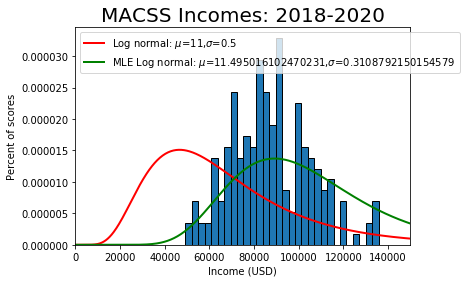

mu_MLE = 11.495016102470231, sig_MLE = 0.3108792150154579 

Log likelihood (MLE) = -2285.8999545081624 

VCV(MLE) =  [[ 9.01872290e-07 -1.16674484e-08  2.01205990e-07  2.28013364e-08
  -3.05785236e-09]
 [-1.16674484e-08  3.88870740e-09  3.42055489e-08  2.55061983e-09
   3.14028582e-11]
 [ 2.01205990e-07  3.42055489e-08  3.53852414e-07 -2.26377049e-08
   1.18606111e-09]
 [ 2.28013364e-08  2.55061983e-09 -2.26377049e-08  2.01728020e-09
   1.44944112e-11]
 [-3.05785236e-09  3.14028582e-11  1.18606111e-09  1.44944112e-11
   2.31088380e-08]]


In [145]:
plt.hist(pts, 30, edgecolor='black', normed=True)
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1),
         linewidth=2, color='r', label='Log normal: $\mu$=11,$\sigma$=0.5')
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE, sig_MLE),
        linewidth=2, color='g', label='MLE Log normal: $\mu$={},$\sigma$={}'.format(mu_MLE, sig_MLE))

plt.legend(loc='upper left')


plt.title('MACSS Incomes: 2018-2020', fontsize=20)
plt.xlabel('Income (USD)')
plt.ylabel('Percent of scores')
plt.xlim([0, 150000])
plt.show()

print('mu_MLE = {}, sig_MLE = {} \n'.format(mu_MLE, sig_MLE))
print('Log likelihood (MLE) = {} \n'.format(np.log(lognorm_pdf(pts, mu_MLE, sig_MLE)).sum()))
print('VCV(MLE) = ', vcv_mle)


(d) Perform likelihood ratio test 

In [102]:
log_lik_h0 = log_lik_lognorm(pts, 11, 0.5)
log_lik_mle = log_lik_lognorm(pts, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('Likelihood ratio: ',LR_val)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)
print('Reject H0')

Likelihood ratio:  199.91408660079105
chi squared of H0 with 2 degrees of freedom p-value =  0.0
Reject H0


(d) What's the probability that one will earn more than \$ 100,000 or less than \$ 75,000

In [105]:
import scipy.integrate as integrate
prob_more_than_100000 = integrate.quad(lambda x: lognorm_pdf(x, mu_MLE, sig_MLE), 100000, np.inf)[0]
prob_less_than_75000 = integrate.quad(lambda x: lognorm_pdf(x, mu_MLE, sig_MLE), 0, 75000)[0]
print('probability of earning less than $75,000:', prob_less_than_75000)
print('probability of earning more than $100,000:', prob_more_than_100000)

probability of earning less than $75,000: 0.19275920035472388
probability of earning more than $100,000: 0.47703014049157744


### Q2 Linear regression and MLE
(a) Estimate the parameters of the model

In [146]:
import pandas as pd
sick_df = pd.read_csv('sick.txt')

In [64]:
def log_lik_norm(xvals, sigma):
    pdf_vals = sts.norm.pdf(xvals, 0, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum() 
    return log_lik_val

def crit2(params, *args):
    b0, b1, b2, b3, sigma = params
    xvals = errors(args[0], b0, b1, b2, b3)
    log_lik_val = log_lik_norm(xvals, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def errors(sick_df, b0, b1, b2, b3):
    e = sick_df['sick'] - b0 - b1 * sick_df['age'] - b2 * sick_df['children'] - b3 * sick_df['avgtemp_winter']
    return pd.DataFrame(e)

In [142]:
params_init = np.array([0,0,0,0,1])
mle_args = (sick_df,)
results = opt.minimize(crit2, params_init, args=(mle_args))
#print(results)
b0, b1, b2, b3, mle_sigma = results.x
print('beta 0 is: ', b0)
print('beta 1 is: ', b1)
print('beta 2 is: ', b2)
print('beta 3 is: ', b3)
print('sigma squared is: ', mle_sigma**2)
print('Log likelihood (MLE) is: ', -results.fun)

OffDiagNeg = np.eye(5)*2-1
vcv_mle = results.hess_inv * OffDiagNeg
print()
print('VCV(MLE) = ', vcv_mle)


beta 0 is:  0.2516465816964294
beta 1 is:  0.012933364999098714
beta 2 is:  0.4005019083146017
beta 3 is:  -0.00999168519088813
sigma squared is:  9.106562964543198e-06
Log likelihood (MLE) is:  876.8650464343755

VCV(MLE) =  [[ 9.01872290e-07 -1.16674484e-08  2.01205990e-07  2.28013364e-08
  -3.05785236e-09]
 [-1.16674484e-08  3.88870740e-09  3.42055489e-08  2.55061983e-09
   3.14028582e-11]
 [ 2.01205990e-07  3.42055489e-08  3.53852414e-07 -2.26377049e-08
   1.18606111e-09]
 [ 2.28013364e-08  2.55061983e-09 -2.26377049e-08  2.01728020e-09
   1.44944112e-11]
 [-3.05785236e-09  3.14028582e-11  1.18606111e-09  1.44944112e-11
   2.31088380e-08]]


(b) Test hypothesis

In [144]:
log_lik_h0 = log_lik_norm(errors(sick_df,1,0,0,0), 0.1)
log_lik_mle = log_lik_norm(errors(sick_df,b0,b1,b2,b3),mle_sigma)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('likelihood ratio: ', LR_val)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)
print('reject H0')

likelihood ratio:  6261.131468953001
chi squared of H0 with 2 degrees of freedom p-value =  0.0
reject H0
